In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'\r\n{"username":"srininvas","key":"7f07943fd20795990d73f2f779353b86"}'}

In [7]:
!mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [8]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:03<00:00, 259MB/s]
100% 812M/812M [00:03<00:00, 221MB/s]


In [11]:
!unzip -qq dogs-vs-cats.zip

In [12]:
!unzip -qq train.zip

#1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500.

Copying images to training,validation and test set.

In [13]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir , exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

Using convulational neural network.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

It can be observed that,model might overfit,thus,we use regularization technique in the stage of DATA PREPROCESSING.

Here,all the images are converted to tensors.

In [17]:

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


callback can be used to save the model's weights after every epoch or to stop training early if the model is not improving. Additionally, callbacks can be used to log metrics, visualize the model's performance, or schedule learning rate changes.

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.5111 - loss: 0.7414 - val_accuracy: 0.5200 - val_loss: 0.6921
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5070 - loss: 0.6932 - val_accuracy: 0.5160 - val_loss: 0.6912
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5335 - loss: 0.6912 - val_accuracy: 0.5040 - val_loss: 0.6917
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.5790 - loss: 0.6802 - val_accuracy: 0.6080 - val_loss: 0.6524
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.6368 - loss: 0.6407 - val_accuracy: 0.6600 - val_loss: 0.6181
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.6536 - loss: 0.6286 - val_accuracy: 0.6930 - val_loss: 0.5887
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.6792 - loss: 0.5840 - val_accuracy: 0.6930 - val_loss: 0.5734
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.7209 - loss: 0.5512 - val_accuracy: 0.6800 

it can be observed that accuracy is increasing with number of epochs.


Accuracy=77.4%
Val_acc=71.2%
test_acc=76.1%

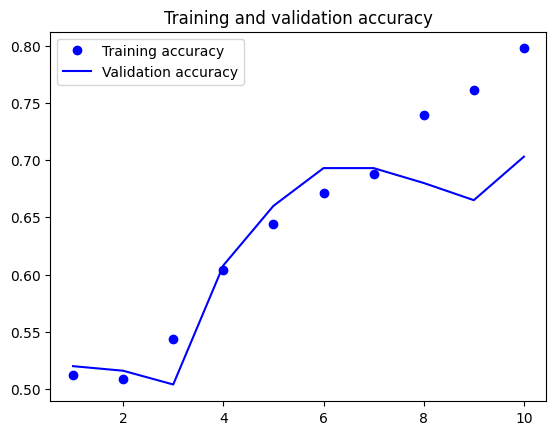

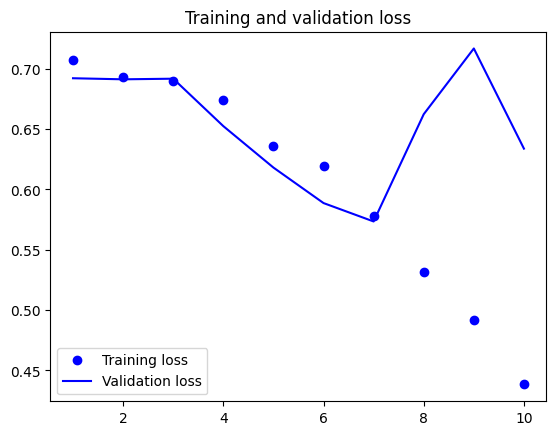

In [21]:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:

test_model = keras.models.load_model("convnet_from_scratch1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6750 - loss: 0.5938
Test accuracy: 0.695


test accuracy with no data augmentation=76.1%

#Data Augmentation

Data augmentation is a technique used to increase the size of a training set by creating new, modified versions of the original data. This helps to reduce overfitting and improve the generalization ability of the model.

In [23]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8032 - loss: 0.4284 - val_accuracy: 0.7190 - val_loss: 0.6600
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.8535 - loss: 0.3464 - val_accuracy: 0.7190 - val_loss: 0.6129
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8829 - loss: 0.2803 - val_accuracy: 0.6890 - val_loss: 1.0574
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9098 - loss: 0.2168 - val_accuracy: 0.7210 - val_loss: 0.7978
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9413 - loss: 0.1623 - val_accuracy: 0.7470 - val_loss: 0.8887
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.9563 - loss: 0.1228 - val_accuracy: 0.7530 - val_loss: 1.0178
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9553 - loss: 0.1210 - val_accuracy: 0.7090 - val_loss: 1.2356
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9716 - loss: 0.0873 - val_accuracy: 0.7240 -

data augmentation to the model did not bring any better results,but yet can be checked by increasing the training sample size and trying on data augmentation on it.

accuracy=73.2%
val_acc=73%
test_acc=72.5%

In [25]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7246 - loss: 0.6392
Test accuracy: 0.728


test accuracy was not improved

#2)Increase training sample size.

Attempted to increase training sample size from 1000 to 1500.

In [26]:

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [27]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [28]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.5126 - loss: 0.7463 - val_accuracy: 0.4990 - val_loss: 0.6923
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.5338 - loss: 0.6957 - val_accuracy: 0.6510 - val_loss: 0.6741
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5907 - loss: 0.6757 - val_accuracy: 0.6810 - val_loss: 0.6312
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.6509 - loss: 0.6359 - val_accuracy: 0.6510 - val_loss: 0.6311
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6955 - loss: 0.5854 - val_accuracy: 0.7040 - val_loss: 0.6062
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7199 - loss: 0.5488 - val_accuracy: 0.7170 - val_loss: 0.5525
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.7429 - loss: 0.5230 - val_accuracy: 0.7330 - val_loss: 0.5725
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.7719 - loss: 0.4861 - val_accuracy: 0.715

In [30]:
test_model = keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7501 - loss: 0.4923
Test accuracy: 0.730


Accuracy=84.5%
val_acc=73.6%
test_acc=75.7%

##using data augmentation

In [31]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [32]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [33]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.5062 - loss: 0.6971 - val_accuracy: 0.5080 - val_loss: 0.6905
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.5339 - loss: 0.6880 - val_accuracy: 0.5850 - val_loss: 0.6896
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.5461 - loss: 0.6878 - val_accuracy: 0.5930 - val_loss: 0.6767
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6142 - loss: 0.6659 - val_accuracy: 0.5940 - val_loss: 0.6786
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.6396 - loss: 0.6407 - val_accuracy: 0.6210 - val_loss: 0.6664
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.6134 - loss: 0.6559 - val_accuracy: 0.6240 - val_loss: 0.6641
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.6258 - loss: 0.6383 - val_accuracy: 0.6940 - val_loss: 0.6362
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.6840 - loss: 0.6040 - val_accuracy: 0.660

In [34]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7209 - loss: 0.5567
Test accuracy: 0.727


accuracy=73.1%
val_acc=70.9%
test_acc=71.4%

#3. Finding the ideal training sample size

We set the training, validation, and test set sizes, respectively, to 1500, 1000, and 500.

In [35]:

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [36]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [37]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.5201 - loss: 0.7210 - val_accuracy: 0.5300 - val_loss: 0.6886
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.5673 - loss: 0.6890 - val_accuracy: 0.6170 - val_loss: 0.6531
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.6221 - loss: 0.6477 - val_accuracy: 0.6380 - val_loss: 0.6384
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.6482 - loss: 0.6234 - val_accuracy: 0.7100 - val_loss: 0.5828
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7036 - loss: 0.5815 - val_accuracy: 0.6750 - val_loss: 0.5937
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.7309 - loss: 0.5369 - val_accuracy: 0.7295 - val_loss: 0.5317
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.7683 - loss: 0.4844 - val_accuracy: 0.6965 - val_loss: 0.6086
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.7960 - loss: 0.4380 - val_accuracy: 0.7

In [39]:

test_model = keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7287 - loss: 0.5673
Test accuracy: 0.731


accuracy=85.6%
val_Acc=73.7%
test_Acc=72.6%

##Using Data augmentation

In [40]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [41]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [42]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.5245 - loss: 0.6995 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5184 - loss: 0.6911 - val_accuracy: 0.5180 - val_loss: 0.6824
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.5304 - loss: 0.6917 - val_accuracy: 0.5825 - val_loss: 0.6628
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5790 - loss: 0.6719 - val_accuracy: 0.6210 - val_loss: 0.6589
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.5999 - loss: 0.6652 - val_accuracy: 0.6080 - val_loss: 0.6820
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.6277 - loss: 0.6480 - val_accuracy: 0.6505 - val_loss: 0.6343
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.6459 - loss: 0.6277 - val_accuracy: 0.6790 - val_loss: 0.6058
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.6682 - loss: 0.6169 - val_accuracy: 0.6935

In [43]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")



32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6875 - loss: 0.6110
Test accuracy: 0.685


Accuracy=53.7%
val_acc=54.5%
test_acc=57.9%

#4.Using a pre-trained network

VGG16 is the architecture of this pre-trained network.

Feature extraction - Instantiating the VGG16 convolutional base

In [44]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Feature extraction - Extracting features and corresponding labels

In [45]:

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

(3000, 5, 5, 512)

Feature extraction - Defining and training the densely connected classifier

In [46]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionPT1.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.8932 - loss: 16.0555 - val_accuracy: 0.9695 - val_loss: 4.0211
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9738 - loss: 3.4094 - val_accuracy: 0.9735 - val_loss: 4.3827
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 1.9417 - val_accuracy: 0.9750 - val_loss: 4.1109
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9913 - loss: 0.6725 - val_accuracy: 0.9790 - val_loss: 3.9152
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.9838 - val_accuracy: 0.9725 - val_loss: 5.6875
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.5926 - val_accuracy: 0.9765 - val_loss: 4.5988
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9959 - loss: 0.6160 - val_accuracy: 0.9700 - val_loss: 6.7710
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9976 - loss: 0.4144 - val_accuracy: 0.9750 - val_los

accuracy=99.8%
val_acc=97.3%

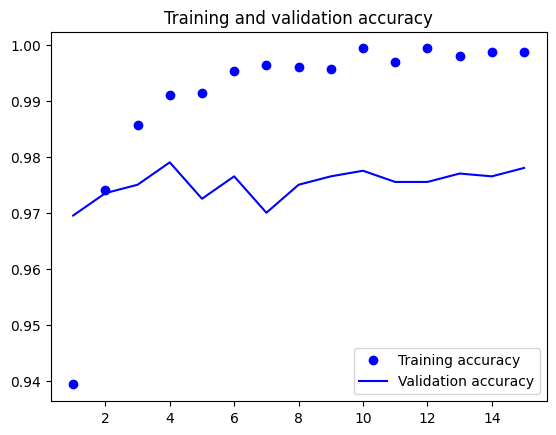

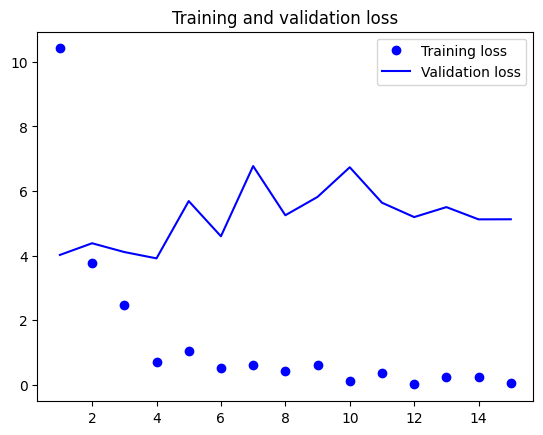

In [47]:

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [48]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False


conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))


conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


##Feature extraction with Data Augmentation

In [49]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [50]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 256ms/step - accuracy: 0.8563 - loss: 37.7369 - val_accuracy: 0.9740 - val_loss: 3.2908
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 184ms/step - accuracy: 0.9374 - loss: 7.8683 - val_accuracy: 0.9690 - val_loss: 6.1785
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.9685 - loss: 4.3072 - val_accuracy: 0.9745 - val_loss: 3.6586
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 187ms/step - accuracy: 0.9583 - loss: 4.8739 - val_accuracy: 0.9740 - val_loss: 4.8654
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.9615 - loss: 4.3060 - val_accuracy: 0.9740 - val_loss: 3.3844


In [52]:

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9581 - loss: 5.7579
Test accuracy: 0.962


accuracy=96.9%
val_Acc=97.4%
test_acc=97.4%